In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



In [59]:
data = pd.read_csv('./NFL.csv')
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position Drafted  
0     offense    backs_receivers       RB     Yes  
1     defense  defensive_lineman       DE     Yes  
2     offense  offensive_lineman       OG     Yes  
3     defense     defensive_back       FS     Yes  
4     defense        line_backer      OLB     Yes

In [60]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Player
Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: count, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


Year       Player  Age    School  Height     Weight  Sprint_40yd  \
3029  2015  Chris Jones  NaN   Alabama  1.7780  82.553811         4.63   
3347  2018  Chris Jones  NaN  Nebraska  1.8288  88.450512         4.57   

      Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  Shuttle  \
3029          82.55               8.0      302.26           6.91     4.19   
3347            NaN              14.0         NaN            NaN      NaN   

     Drafted..tm.rnd.yr.        BMI Player_Type    Position_Type Position  \
3029                 NaN  26.114013     offense  backs_receivers       WR   
3347                 NaN  26.446483     defense   defensive_back       CB   

     Drafted  
3029      No  
3347      No

In [61]:
print(data['Drafted'].value_counts())


Drafted
Yes    2254
No     1223
Name: count, dtype: int64


In [62]:
print(data['Year'].value_counts())

Year
2014    333
2013    332
2011    329
2016    329
2009    327
2017    327
2010    326
2012    324
2015    322
2018    308
2019    220
Name: count, dtype: int64


In [63]:
# For our model we will need to convert the drafted values to Binary. 

data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()



Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  Agility_3cone  \
0         4.38          85.09              25.0      325.12            NaN   
1         4.84          83.82              27.0      292.10           7.38   
2         5.50            NaN              21.0         NaN            NaN   
3         4.49          93.98              15.0      304.80           7.09   
4         4.76          92.71              26.0      304.80           7.10   

   Shuttle                          Drafted..tm.rnd.yr.        BMI  \
0      NaN   Arizona Cardinals / 1st / 31st pick / 2009  31.004194   
1     4.45  Arizona Cardinals / 6th / 204th pick / 2009  33.510073   
2      NaN  Arizona Cardinals / 5th / 167th pick / 2009  41.005821   
3     4.23   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463   
4     4.40   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425   

  Player_Type      Position_Type Position  Drafted  
0     offense    backs_receivers       RB        1  
1     defense  defensive_lineman       DE        1  
2     offense  offensive_lineman       OG        1  
3     defense     defensive_back       FS        1  
4     defense        line_backer      OLB        1

In [64]:
nan_counts = data.isna().sum()
nan_counts


Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

In [65]:
data = data.drop(columns=['Agility_3cone', 'Shuttle'])

In [66]:
data.head()

Year                   Player   Age       School  Height      Weight  \
0  2009    Beanie Wells\WellCh00  20.0     Ohio St.  1.8542  106.594207   
1  2009      Will Davis\DaviWi99  22.0     Illinois  1.8796  118.387609   
2  2009  Herman Johnson\JohnHe23  24.0          LSU  2.0066  165.107623   
3  2009  Rashad Johnson\JohnRa98  23.0      Alabama  1.8034   92.079251   
4  2009      Cody Brown\BrowCo96  22.0  Connecticut  1.8796  110.676538   

   Sprint_40yd  Vertical_Jump  Bench_Press_Reps  Broad_Jump  \
0         4.38          85.09              25.0      325.12   
1         4.84          83.82              27.0      292.10   
2         5.50            NaN              21.0         NaN   
3         4.49          93.98              15.0      304.80   
4         4.76          92.71              26.0      304.80   

                           Drafted..tm.rnd.yr.        BMI Player_Type  \
0   Arizona Cardinals / 1st / 31st pick / 2009  31.004194     offense   
1  Arizona Cardinals / 6th / 204th pick / 2009  33.510073     defense   
2  Arizona Cardinals / 5th / 167th pick / 2009  41.005821     offense   
3   Arizona Cardinals / 3rd / 95th pick / 2009  28.312463     defense   
4   Arizona Cardinals / 2nd / 63rd pick / 2009  31.327425     defense   

       Position_Type Position  Drafted  
0    backs_receivers       RB        1  
1  defensive_lineman       DE        1  
2  offensive_lineman       OG        1  
3     defensive_back       FS        1  
4        line_backer      OLB        1

In [67]:
data[['Name', 'ID']] = data['Player'].str.split('\\', expand=True)
data.drop('Player', axis=1, inplace=True)

data.columns

Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Drafted..tm.rnd.yr.', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Drafted', 'Name', 'ID'],
      dtype='object')

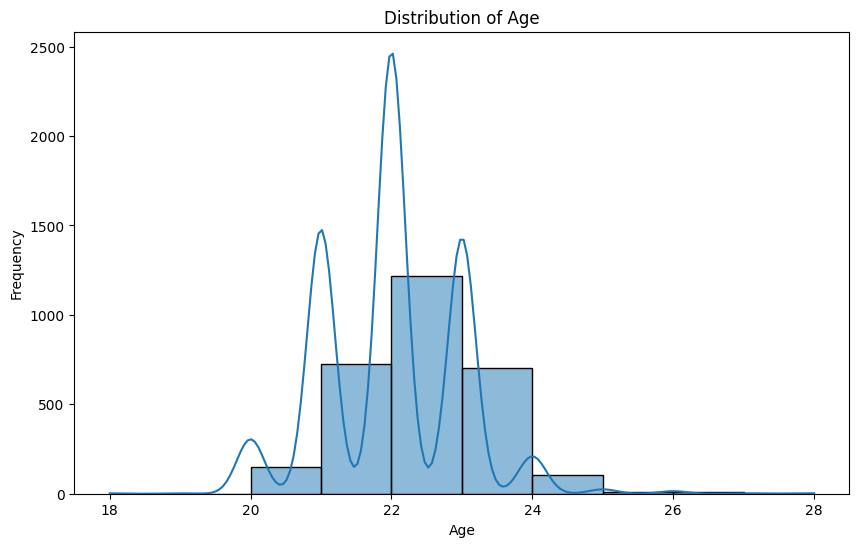

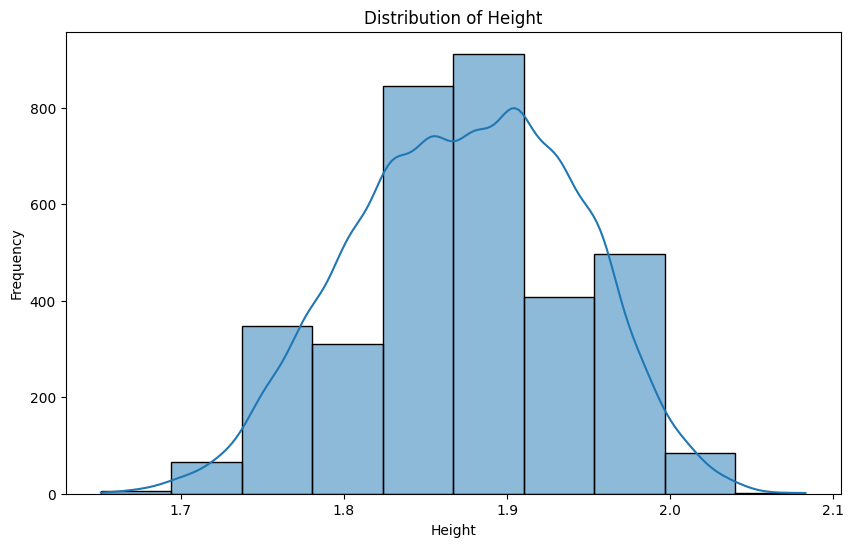

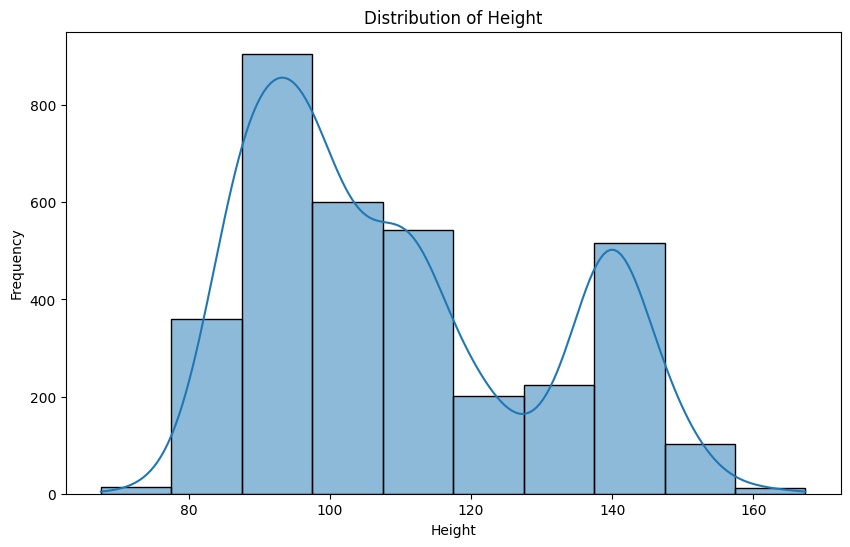

In [68]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

C:\Users\Aditya Kumar\AppData\Local\Temp\ipykernel_15128\2298027967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


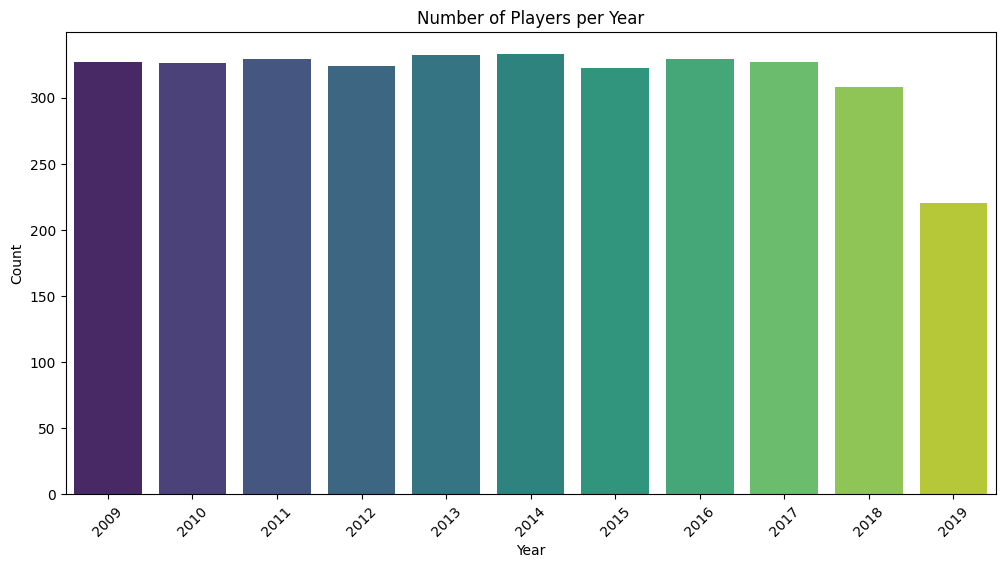

In [69]:

year_counts = data['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Players per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

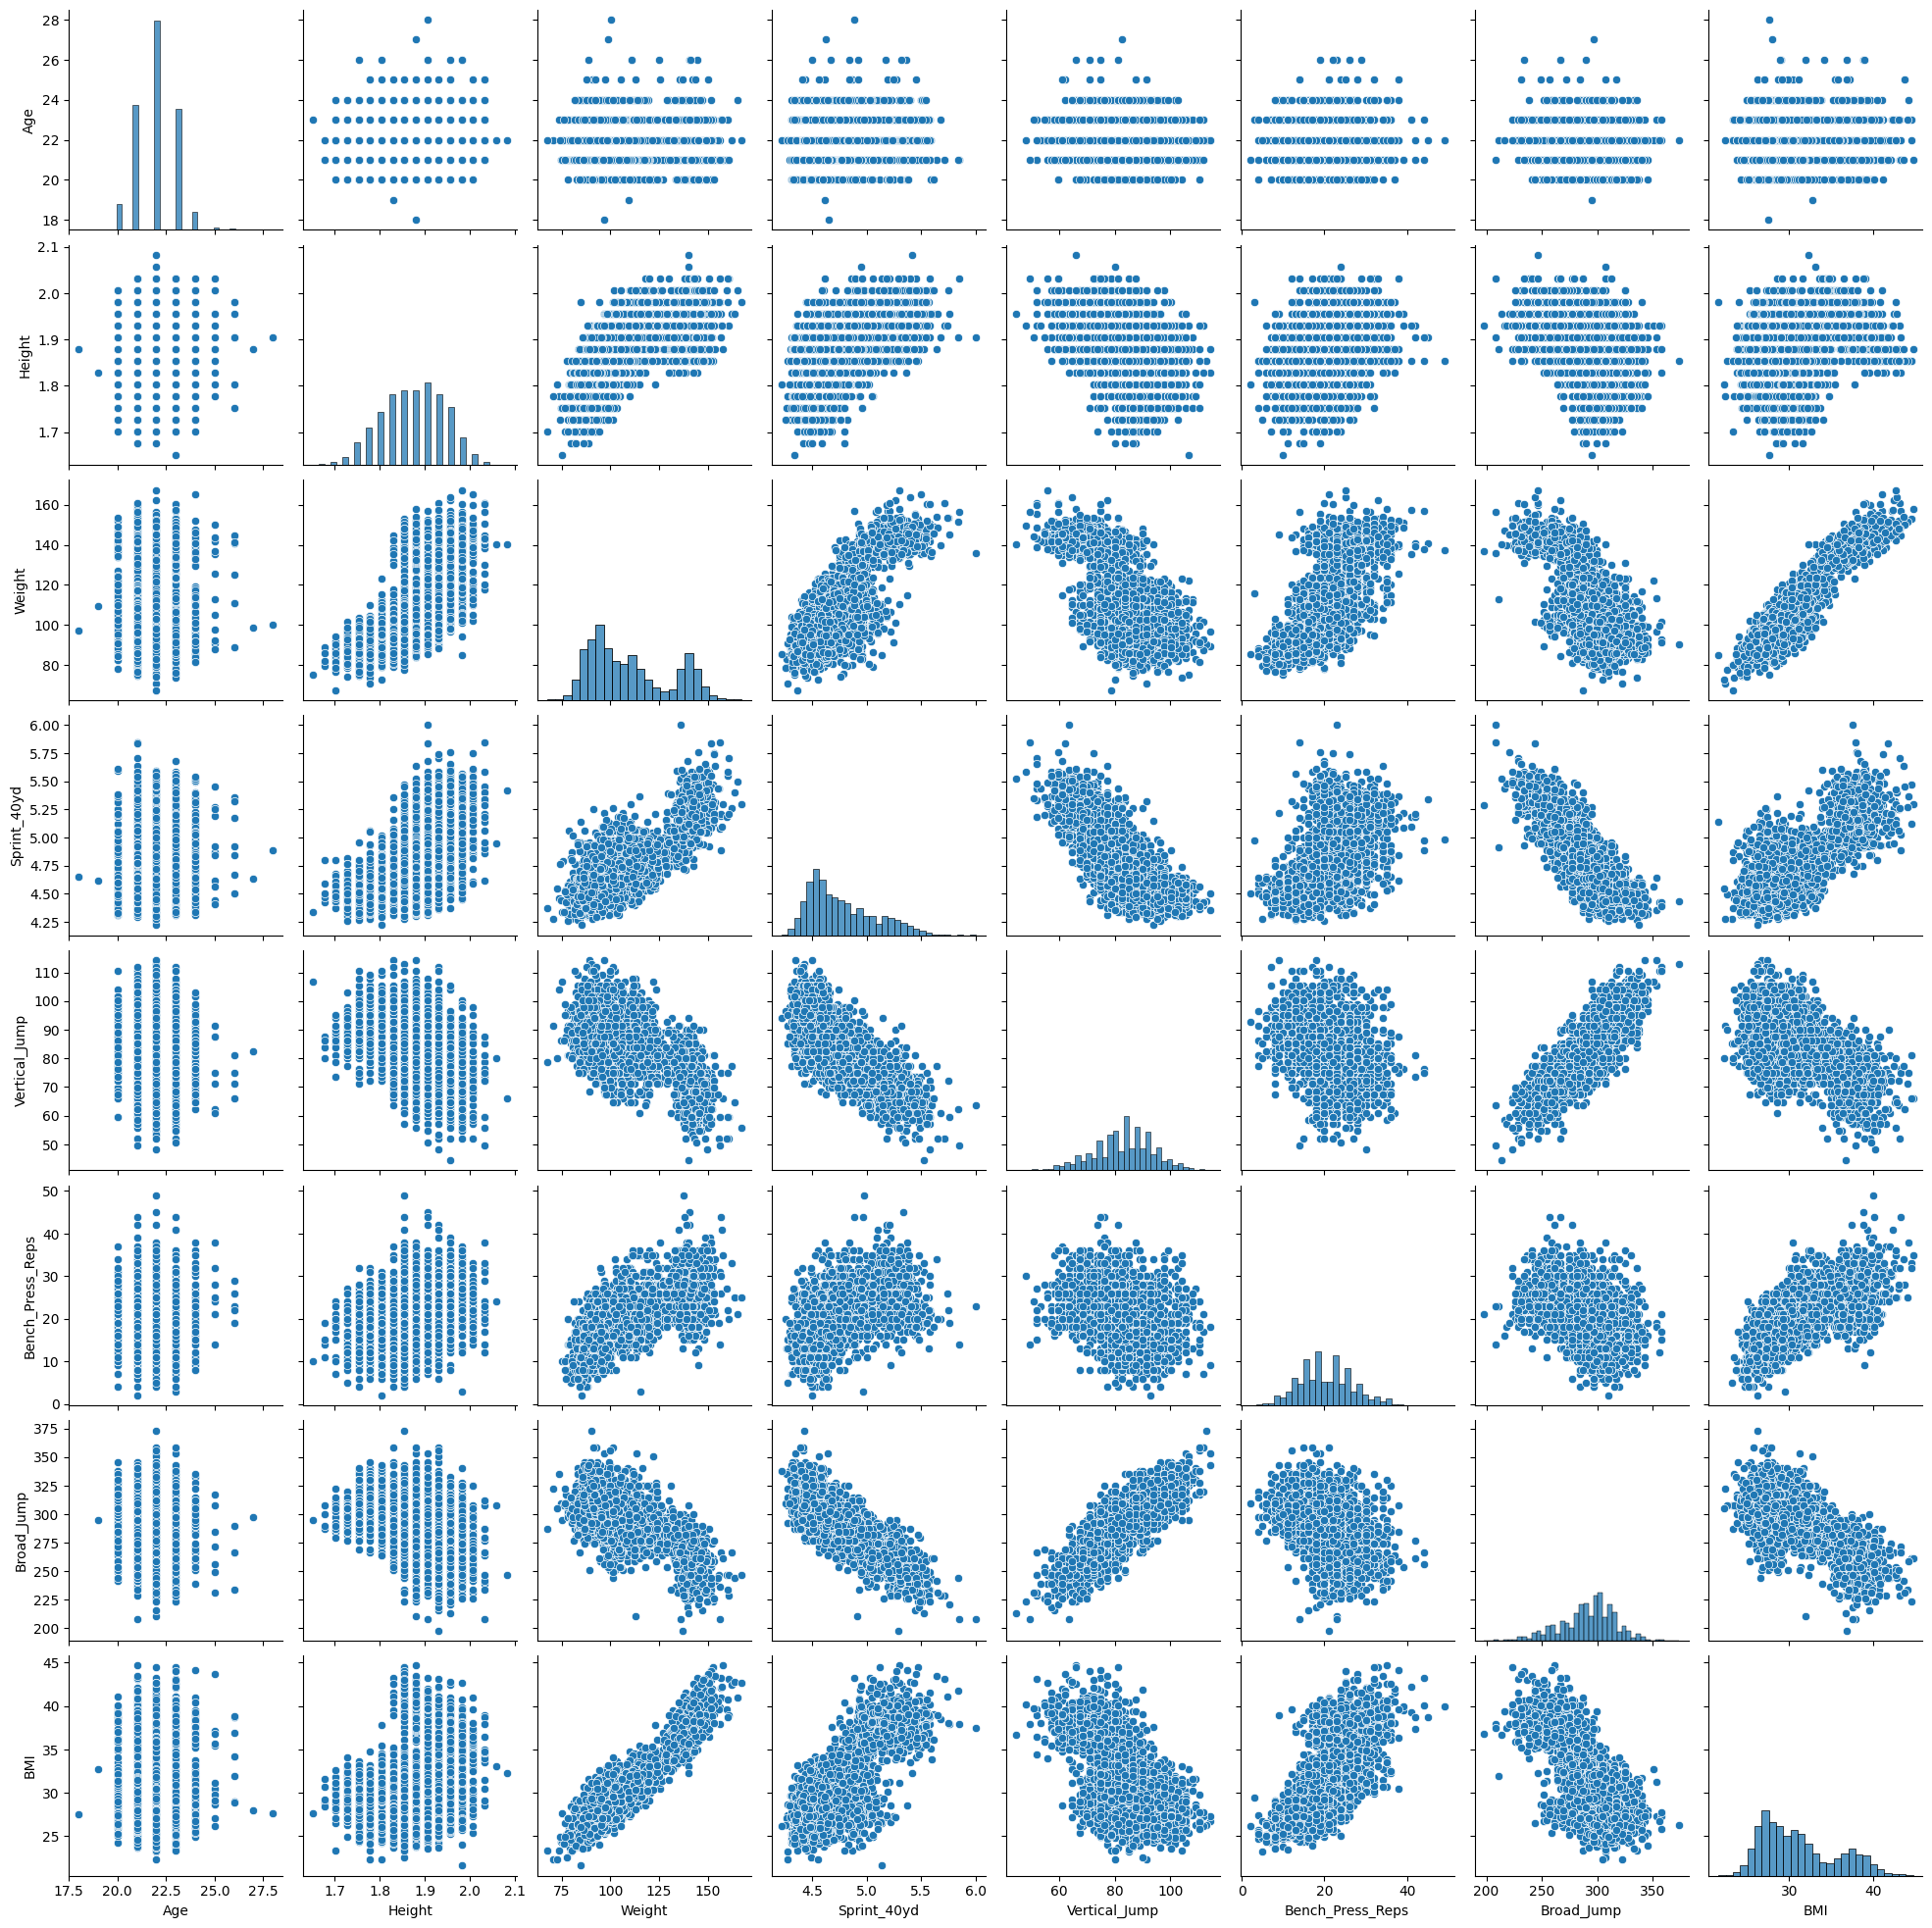

In [70]:
# Pair plot of numerical features
sns.pairplot(data[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI']])
plt.show()

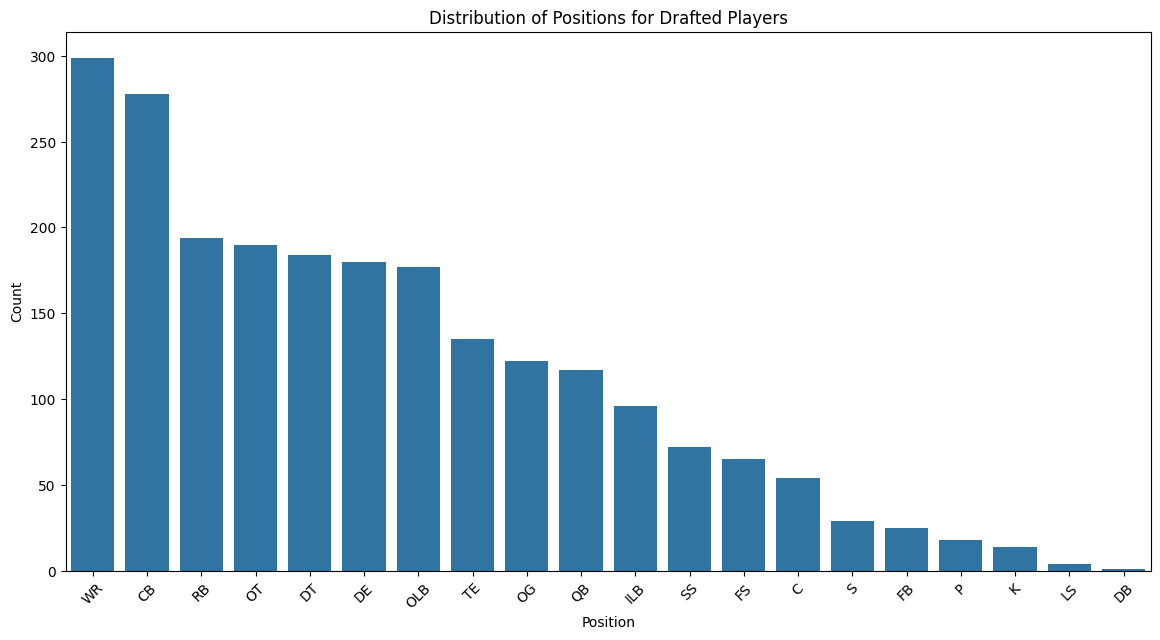

In [71]:
# Filter the data for drafted players
drafted_data = data[data['Drafted'] == 1]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

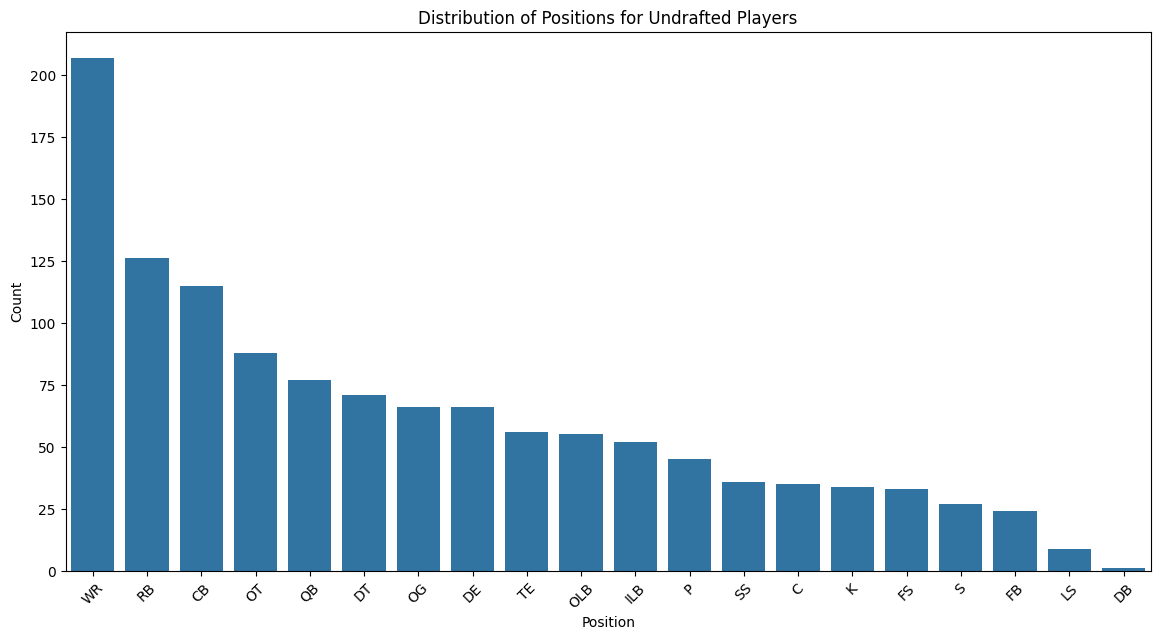

In [72]:
# Filter the data for drafted players
undrafted_data = data[data['Drafted'] == 0]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=undrafted_data, order=undrafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Undrafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

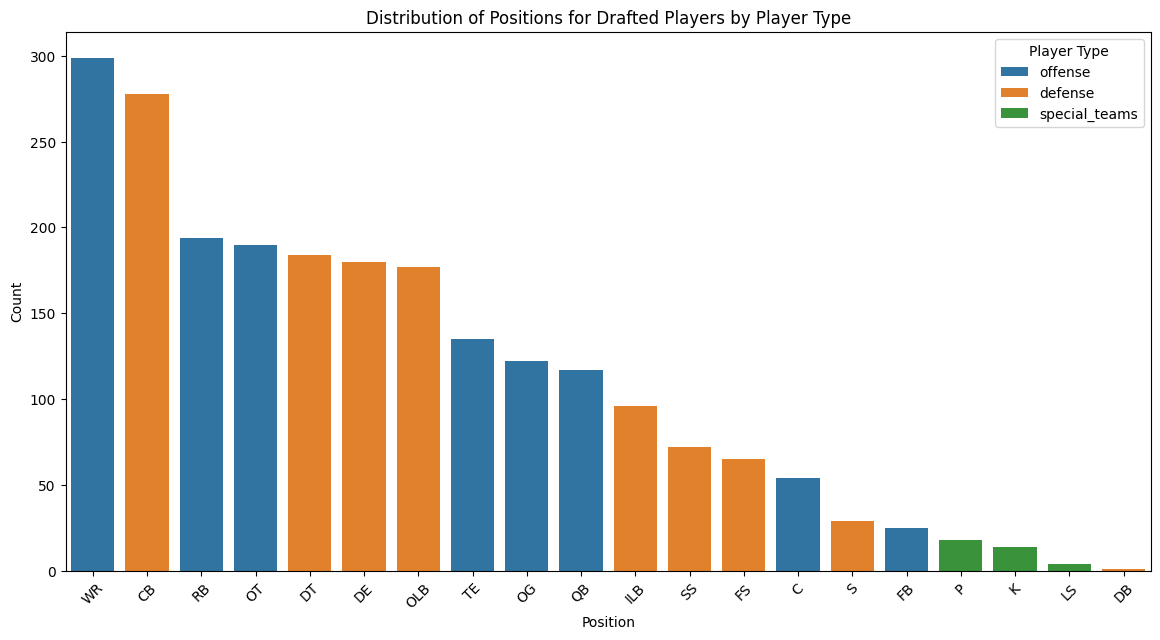

In [73]:
# Bar plot of positions for drafted players with player type
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', hue='Player_Type', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players by Player Type')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Player Type')
plt.show()

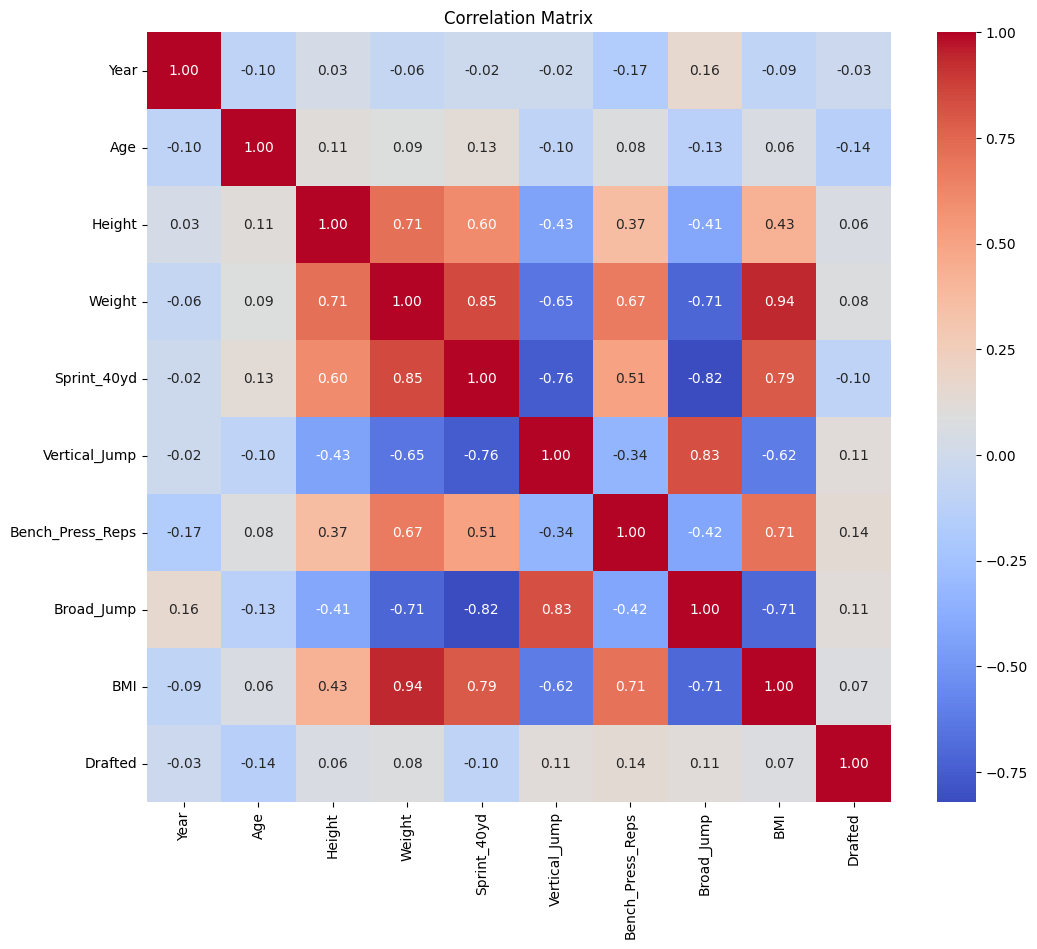

In [74]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


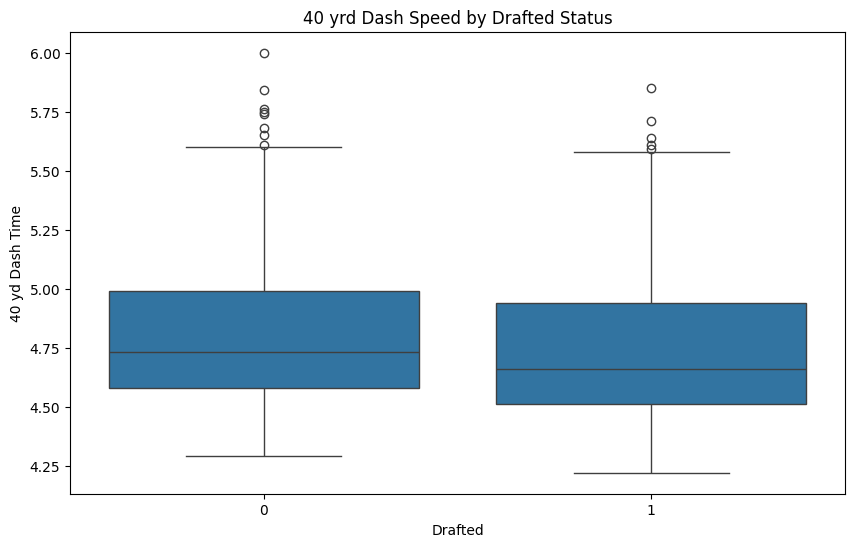

In [75]:
#Jenna Graphs - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drafted', y='Sprint_40yd', data=data)
plt.title('40 yrd Dash Speed by Drafted Status')
plt.xlabel('Drafted')
plt.ylabel('40 yd Dash Time')
plt.show()

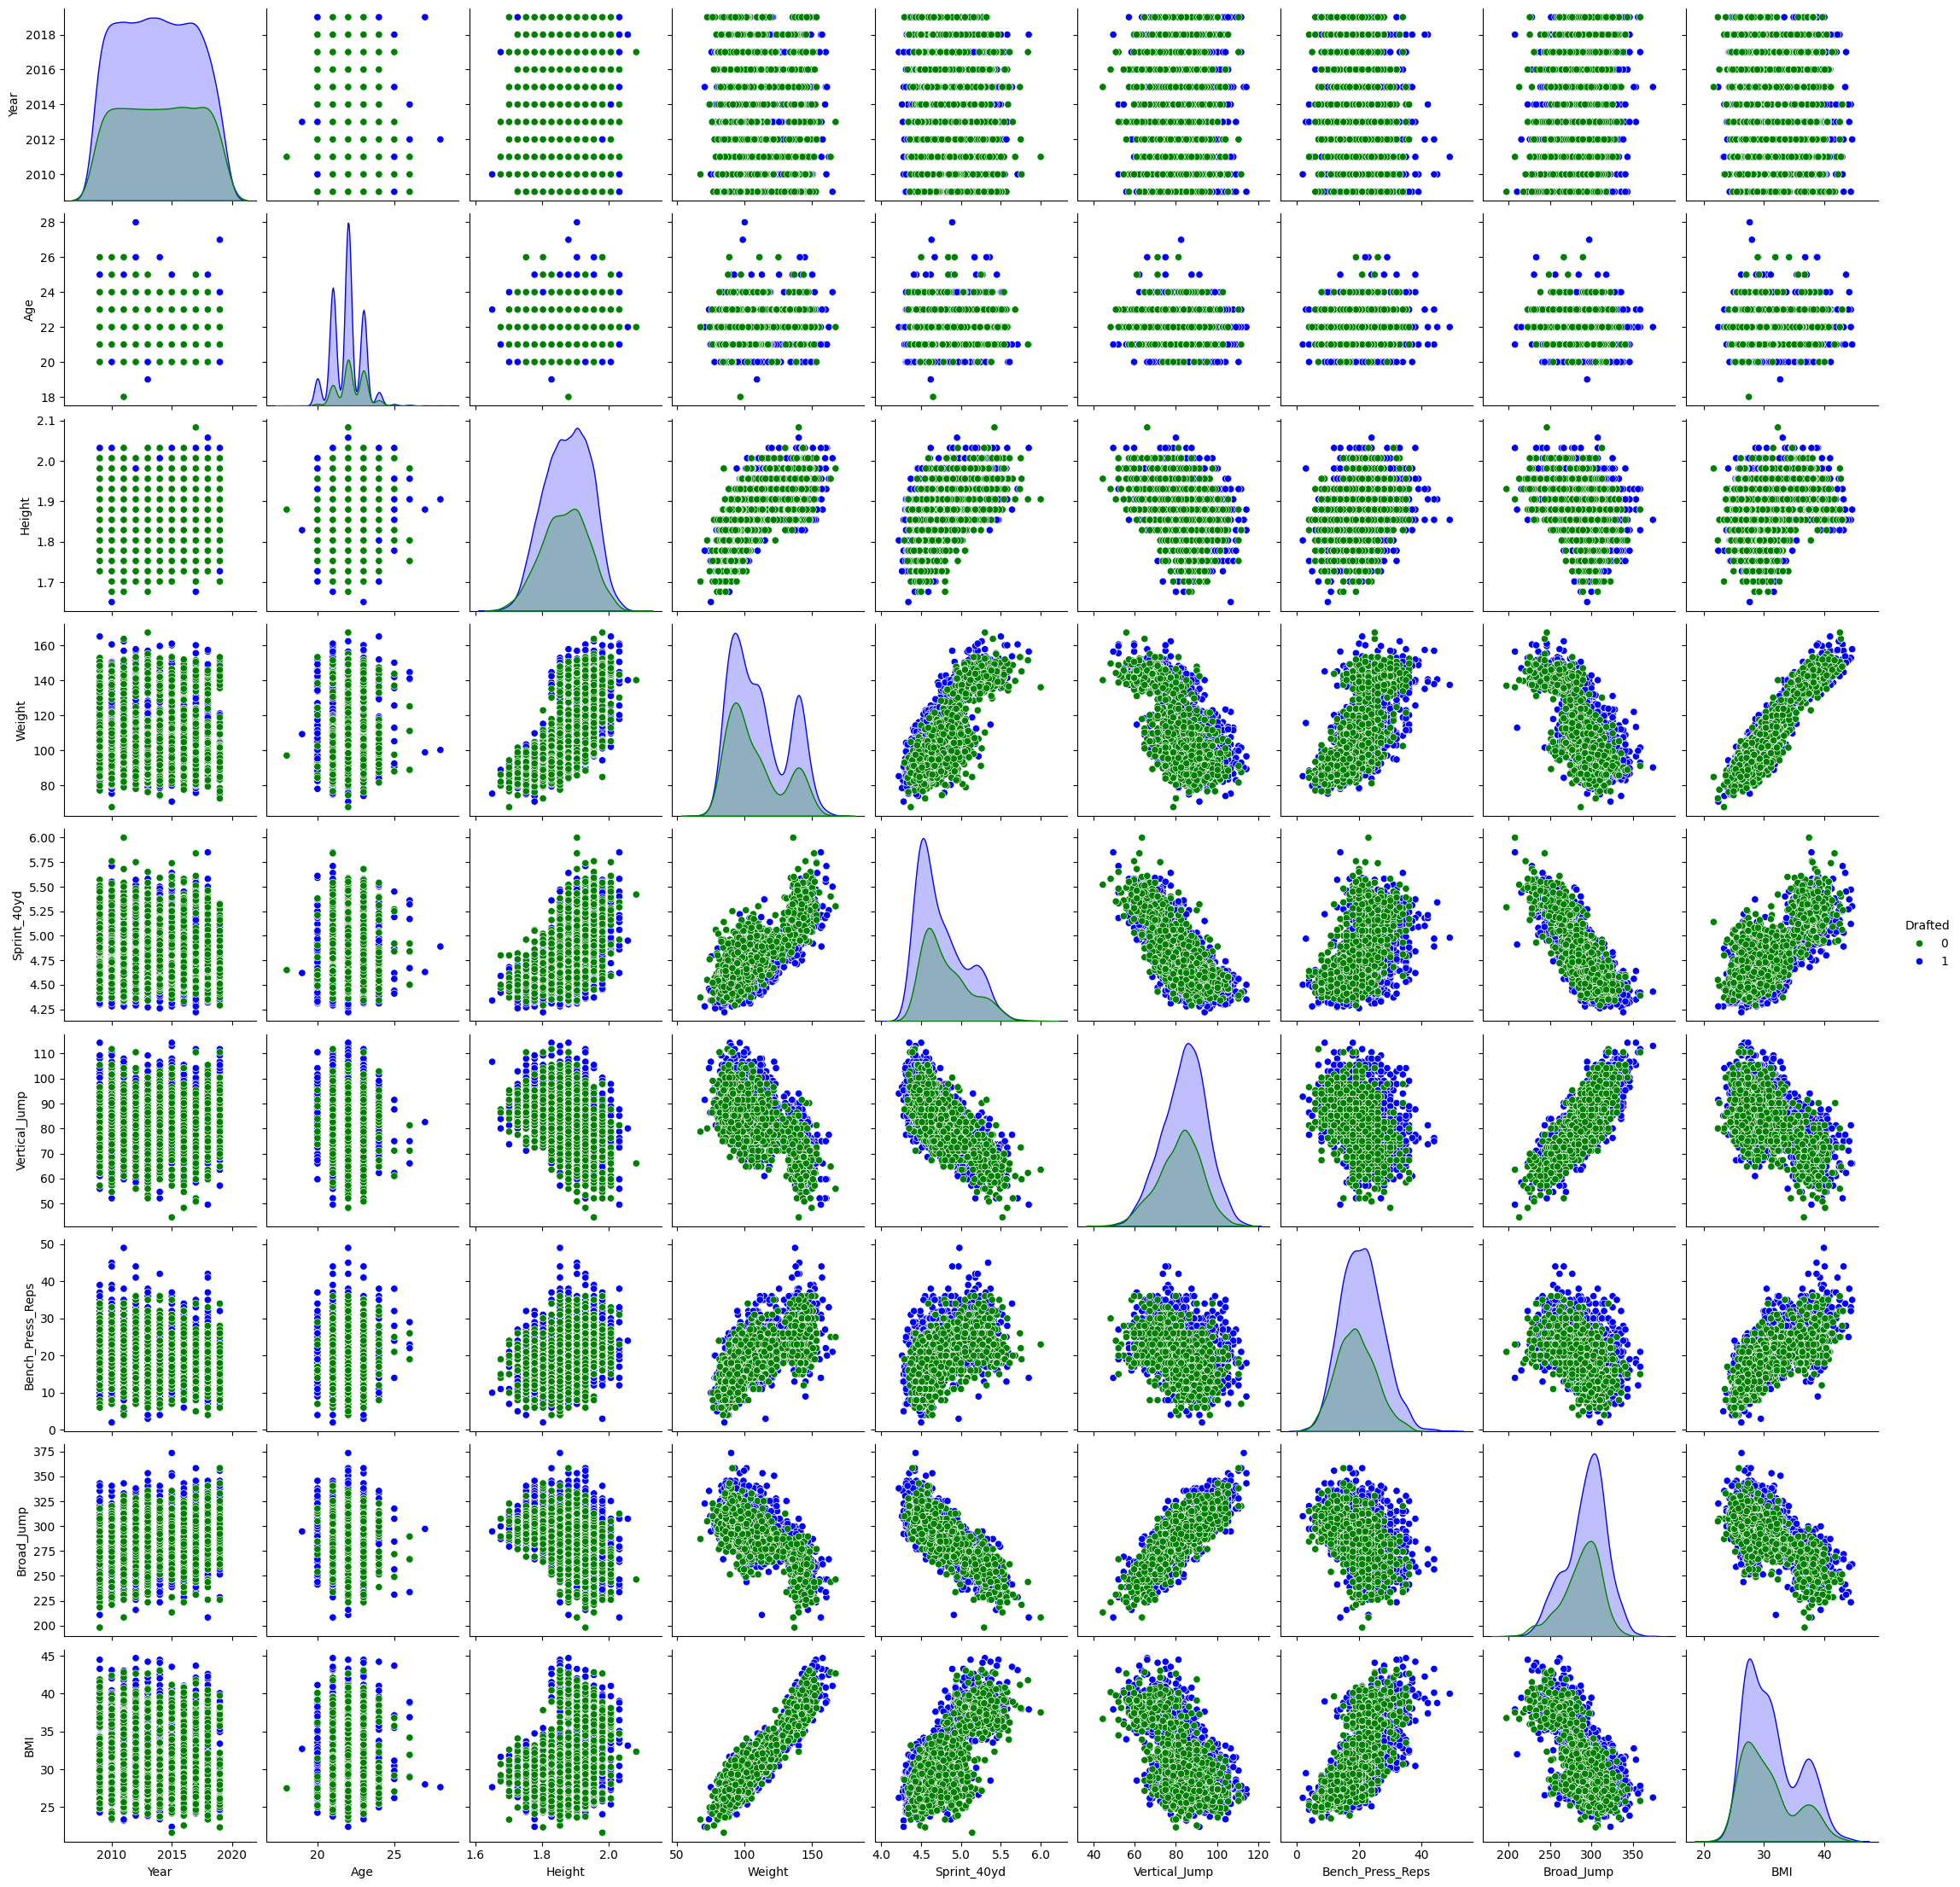

In [76]:
#Jenna Graphs - Pairplot
palette = {1:"blue", 0:"green"}
sns.pairplot(data, hue='Drafted', palette=palette)
plt.show()

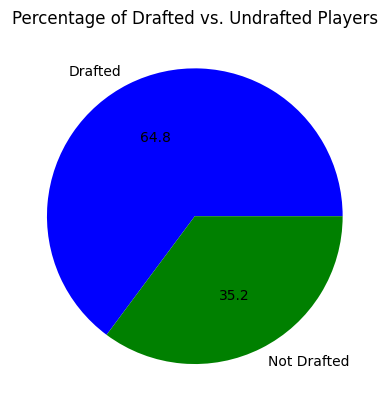

In [77]:
#Jenna Graph
# Looking  at the split in the data between drafted and non drafted
draft_counts = data['Drafted'].value_counts()
labels = ['Drafted', 'Not Drafted']
colors = ['blue', 'green']

plt.pie(draft_counts, labels=labels, colors=colors, autopct='%.1f')
plt.title('Percentage of Drafted vs. Undrafted Players')
plt.show()

# Data Prep for Model

In [78]:
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing numerical values with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

#Defining Categorical Columns (String based columns)
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# Drop unnecessary columns
data.drop(['Drafted..tm.rnd.yr.'], axis=1, inplace=True)



In [79]:
#Increasing the number of samples
#Imported from Jenna Notebook
from sklearn.utils import resample
drafted = data[data['Drafted']==1]
not_drafted = data[data['Drafted']==0]
not_drafted_additional_samples = resample(not_drafted, replace=True, n_samples = len(drafted), random_state = 42)
new_data = pd.concat([drafted, not_drafted_additional_samples])

# Feature Selection

In [80]:
# Define features and target
X = new_data.drop(columns=['Drafted'])
y = new_data['Drafted']

In [81]:
# Split the data into train, validation, and test sets

#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Jenna Version

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2524, 14)
Shape of X_val: (631, 14)
Shape of X_test: (1353, 14)
Shape of y_train: (2524,)
Shape of y_val: (631,)
Shape of y_test: (1353,)


In [82]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [83]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


In [84]:
# Print the feature names used in the models
feature_names = data.drop(columns=['Drafted']).columns  # Drop the target column
print("Features used in the model:")
print(feature_names)

Features used in the model:
Index(['Age', 'School', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump',
       'Bench_Press_Reps', 'Broad_Jump', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Name', 'ID'],
      dtype='object')


# Building the model

## Model 1: Simple Neural Network

In [85]:
# Build a simple neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # 2 classes: drafted and not drafted
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat),verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)


# Make predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

# Model Summary
model.summary()

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7564 - loss: 0.5666 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8074 - loss: 0.5236


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,120 (102.04 KB)

 Trainable params: 8,706 (34.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,414 (68.03 KB)

Training Accuracy: 0.9279
Validation Accuracy: 0.7702
Test Accuracy: 0.7967


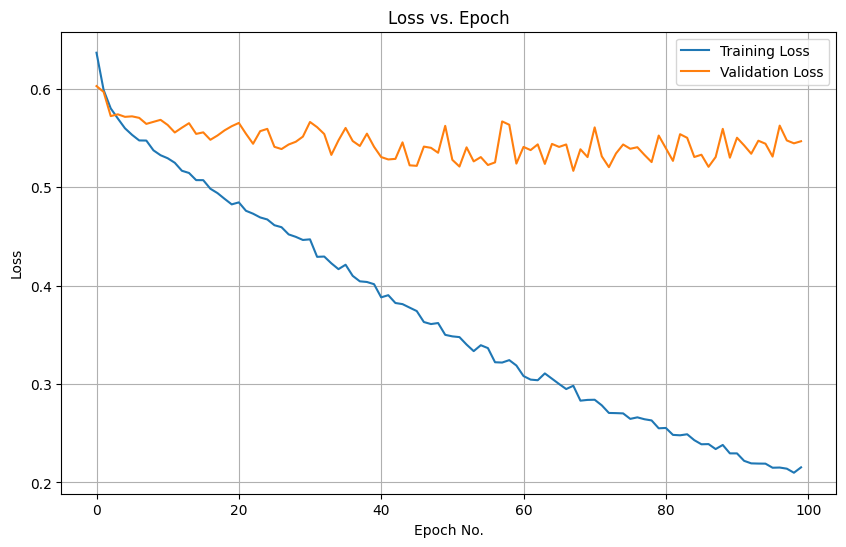

In [86]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
"""0. Numpy_review_AK.ipynb# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes
test_results['Name'] = data.loc[test_results.index, 'Name']

test_results = test_results[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results.sample(10))
"""

"0. Numpy_review_AK.ipynb# Make predictions\ny_test_pred = model.predict(X_test)\ny_test_pred_classes = y_test_pred.argmax(axis=1)\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results = pd.DataFrame(X_test, columns=X.columns)\ntest_results['Actual'] = y_test\ntest_results['Predicted'] = y_test_pred_classes\ntest_results['Name'] = data.loc[test_results.index, 'Name']\n\ntest_results = test_results[['Name', 'Actual', 'Predicted']]\n\n# Print a sample of the results\nprint(test_results.sample(10))\n"

## Visualizing the predictions

In [88]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes

# Assuming 'data' has the original indices
test_results['Name'] = data.iloc[test_results.index]['Name']

test_results = test_results[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results.head(15))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        1          1
6        0          0
7        0          0
8        1          0
9        0          0
10       1          1
11       1          1
12       0          0
13       1          0
14       0          0


# Calculating the model accuracy

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes))

Test Set Evaluation
Confusion Matrix:
[[534 118]
 [157 544]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       652
           1       0.82      0.78      0.80       701

    accuracy                           0.80      1353
   macro avg       0.80      0.80      0.80      1353
weighted avg       0.80      0.80      0.80      1353


Accuracy Score:
0.7967479674796748


## Model 2: Logistic Regression

In [90]:
# Model 2 - Logistic Regression

# Initialize the logistic regression model
num_features = X_train.shape[1]
learning_rate = 0.01

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), verbose=0)

#Model Summary
model2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy2:.4f}")

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Evaluate the model on the test set
test_loss2, test_accuracy2= model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")



c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Evaluating the results now:
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.6581 - loss: 0.6233
Training Accuracy: 0.6470
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.6912 - loss: 0.6043
Validation Accuracy: 0.6862
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.6343 - loss: 0.6488
Test Accuracy: 0.6371


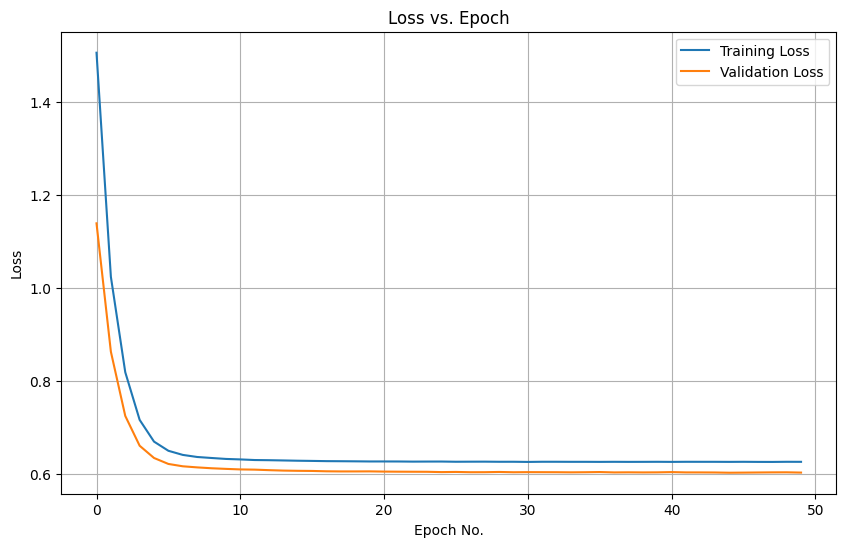

In [91]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
"""# Get the predicted probabilities for the test set
y_test_pred_prob2 = model2.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
y_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison
test_results2 = pd.DataFrame(X_test, columns=X.columns)
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred2
test_results2 = test_results2[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.sample(10))"""

'# Get the predicted probabilities for the test set\ny_test_pred_prob2 = model2.predict(X_test)\n\n# Convert predicted probabilities to class labels (0 or 1)\ny_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results2 = pd.DataFrame(X_test, columns=X.columns)\ntest_results2[\'Actual\'] = y_test\ntest_results2[\'Predicted\'] = y_test_pred2\ntest_results2 = test_results2[[\'Name\', \'Actual\', \'Predicted\']]\n\n# Print a sample of the results\nprint(test_results2.sample(10))'

## Visualizing the predictions

In [93]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions for model2
y_test_pred_prob2 = model2.predict(X_test)
y_test_pred_classes2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison for model2
test_results2 = X_test.copy()
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred_classes2

# Assuming 'data' has the original indices
test_results2['Name'] = data.iloc[test_results2.index]['Name']

# Select relevant columns
test_results2 = test_results2[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.head(15))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
    Actual  Predicted
0        1          1
1        1          0
2        0          1
3        1          0
4        0          1
5        1          1
6        0          1
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          1


## calculating the accuracy

In [94]:
# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes2))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes2))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes2))

Test Set Evaluation
Confusion Matrix:
[[427 225]
 [266 435]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       652
           1       0.66      0.62      0.64       701

    accuracy                           0.64      1353
   macro avg       0.64      0.64      0.64      1353
weighted avg       0.64      0.64      0.64      1353


Accuracy Score:
0.6371027346637103


## Extra Plots

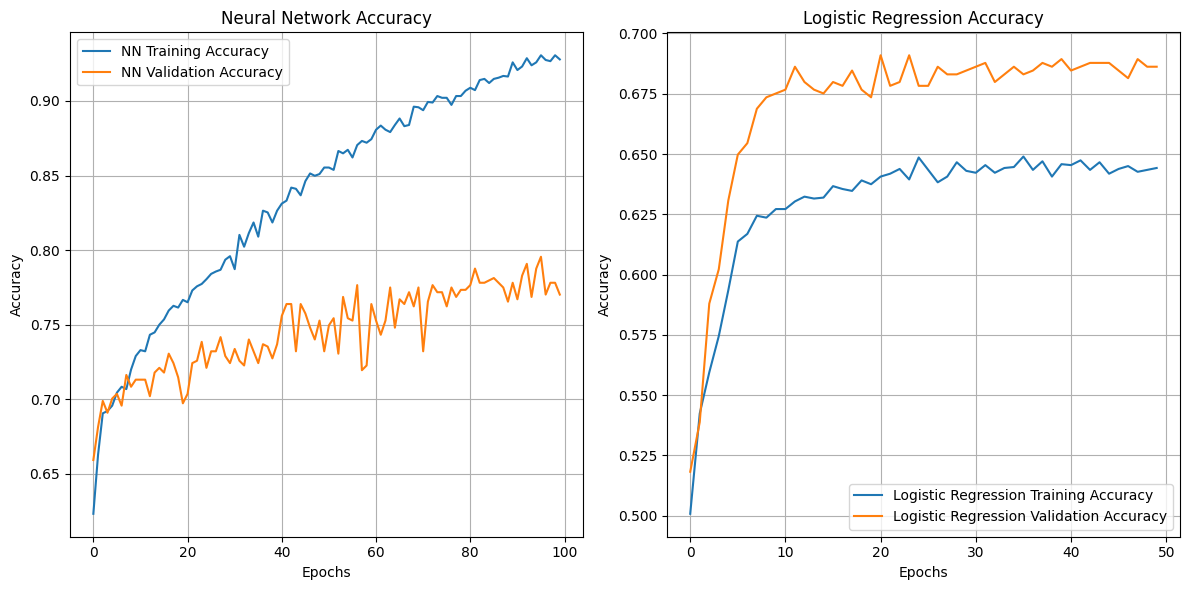

In [95]:
# Plotting the accuracies for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Logistic Regression Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Logistic Regression Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

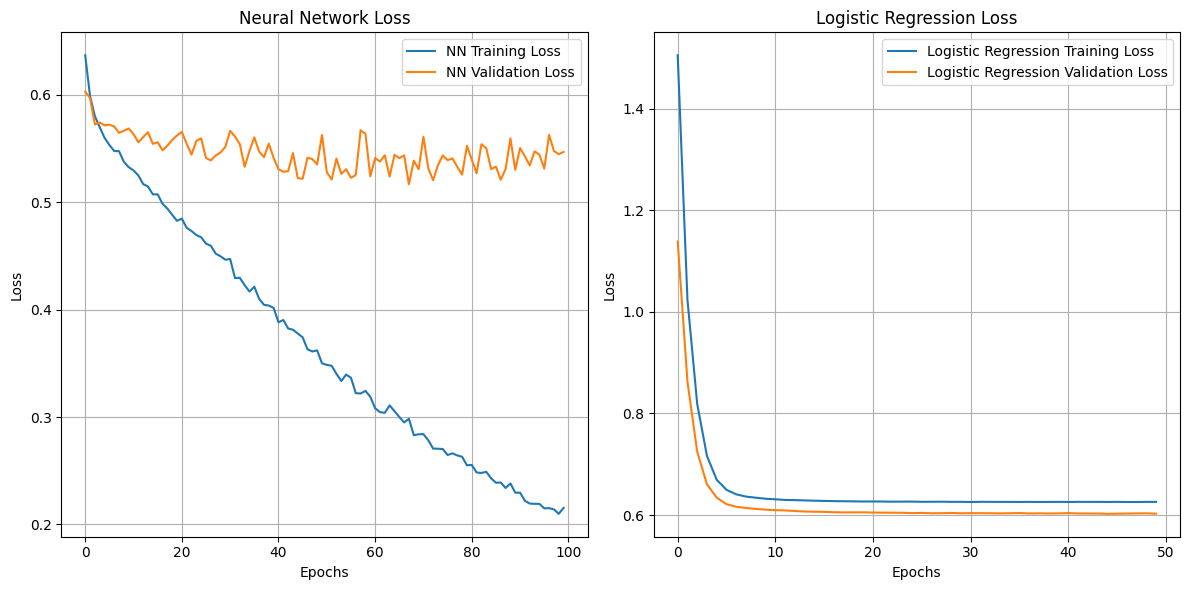

In [96]:
# Plotting the losses for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Logistic Regression Training Loss')
plt.plot(history2.history['val_loss'], label='Logistic Regression Validation Loss')
plt.title('Logistic Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model 3 - CNN

In [97]:
# Convert to NumPy arrays
X_train_np = np.array(X_train)
X_val_np = np.array(X_val)
X_test_np = np.array(X_test)

# Reshape the input data to be 3D
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_val_reshaped = X_val_np.reshape((X_val_np.shape[0], X_val_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

model3 = Sequential([
    Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history3 = model3.fit(X_train_reshaped, y_train_cat, epochs=100, batch_size=64, validation_data=(X_val_reshaped, y_val_cat),verbose=0)

#Model Summary
model3.summary()

# Evaluate the model on the validation set
val_loss3, val_accuracy3 = model3.evaluate(X_val_reshaped, y_val_cat)

# Make predictions
y_test_pred3 = model3.predict(X_test_reshaped)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Evaluate the model on the test set
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_cat)

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy3 = history3.history['accuracy'][-1]

print(f"Training Accuracy: {train_accuracy3:.4f}")
print(f"Validation Accuracy: {val_accuracy3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 512)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,305,288 (24.05 MB)

 Trainable params: 2,101,762 (8.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,203,526 (16.04 MB)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7252 - loss: 1.6209
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7497 - loss: 1.7669
Training Accuracy: 0.9861
Validation Accuracy: 0.7496
Test Accuracy: 0.7450


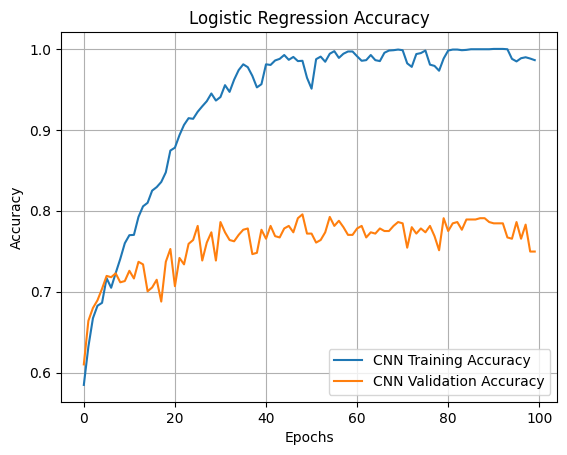

In [98]:
plt.plot(history3.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

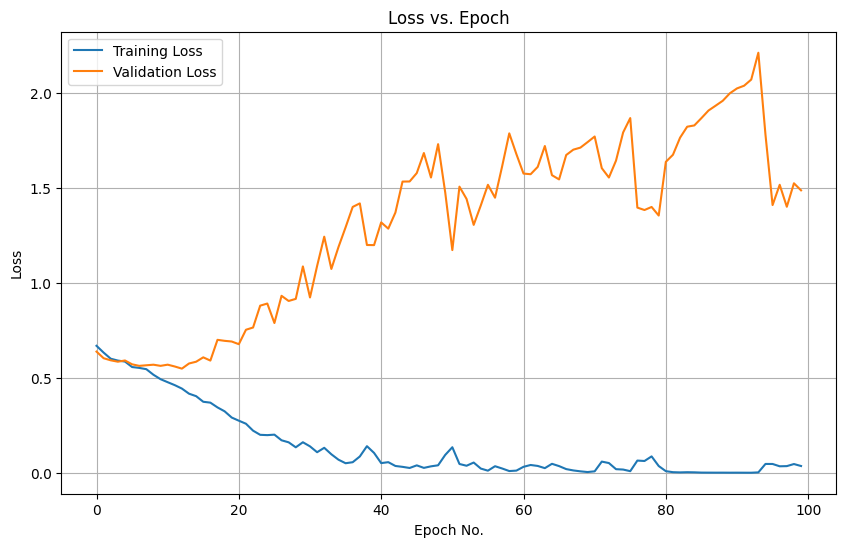

In [99]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Combine the predictions with the actual labels and features for comparison
test_results3 = pd.DataFrame(X_test, columns=X.columns)
test_results3['Actual'] = y_test
test_results3['Predicted'] = y_test_pred_classes3
test_results3['Name'] = data.loc[test_results3.index, 'Name']

test_results3 = test_results3[[ 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results3.head(15))

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          1
5        1          1
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       1          1
12       0          0
13       1          0
14       0          0


In [101]:

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_test_pred_classes3)
precision = precision_score(y_test, y_test_pred_classes3)
recall = recall_score(y_test, y_test_pred_classes3)
f1 = f1_score(y_test, y_test_pred_classes3)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_classes3))

Accuracy: 0.7450
Precision: 0.8284
Recall: 0.6405
F1 Score: 0.7224

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.76       652
           1       0.83      0.64      0.72       701

    accuracy                           0.75      1353
   macro avg       0.76      0.75      0.74      1353
weighted avg       0.76      0.75      0.74      1353



## Model 4 - Random Forest

In [102]:
# Initialize the Random Forest model
model4 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_train_pred4 = model4.predict(X_train)
y_val_pred4 = model4.predict(X_val)
y_test_pred4 = model4.predict(X_test)

# Evaluate the model
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)

precision4 = precision_score(y_test, y_test_pred4)
recall4 = recall_score(y_test, y_test_pred4)
f1_score4 = f1_score(y_test, y_test_pred4)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy4:.4f}")
print(f"Validation Accuracy: {val_accuracy4:.4f}")
print(f"Test Accuracy: {test_accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_score4:.4f}")

# Confusion Matrix
conf_matrix4 = confusion_matrix(y_test, y_test_pred4)
print("Confusion Matrix:")
print(conf_matrix4)

Training Accuracy: 0.9992
Validation Accuracy: 0.8447
Test Accuracy: 0.8418
Precision: 0.8729
Recall: 0.8131
F1 Score: 0.8419
Confusion Matrix:
[[569  83]
 [131 570]]


c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [103]:
# Make predictions on the test set
y_test_pred4 = model4.predict(X_test)

# Combine the predictions with the actual labels and features for comparison
test_results4 = pd.DataFrame(X_test, columns=X.columns)
test_results4['Actual'] = y_test
test_results4['Predicted'] = y_test_pred4

# Assuming 'data' has the original indices
test_results4['Name'] = data.iloc[test_results4.index]['Name']

# Select relevant columns for display
test_results4 = test_results4[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results4.sample(15))

      Name  Actual  Predicted
612   1927       1          1
1294  3232       1          1
8     2164       1          1
440   3085       0          0
880   2793       0          1
1202  2914       0          0
1114  2103       0          0
826   1694       1          1
98    1431       1          1
879   1137       1          0
610   2459       1          1
88     169       1          1
925   2673       1          1
1050  1663       0          0
823   1996       0          0


c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [104]:
# Feature importance
importances = model4.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
13                ID    0.186390
4        Sprint_40yd    0.108686
12              Name    0.086807
8                BMI    0.083296
0                Age    0.078188
3             Weight    0.075812
1             School    0.071559
7         Broad_Jump    0.063962
6   Bench_Press_Reps    0.062165
5      Vertical_Jump    0.062160
2             Height    0.054175
11          Position    0.036095
10     Position_Type    0.016161
9        Player_Type    0.014543


In [105]:
# Create a dictionary to store the results
results = {
    'Model': ['Neural Network', 'Logistic Regression', 'CNN', 'Random Forest'],
    'Training Accuracy': [train_accuracy, train_accuracy2, train_accuracy3, train_accuracy4],
    'Validation Accuracy': [val_accuracy, val_accuracy2, val_accuracy3, val_accuracy4],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Training Accuracy  Validation Accuracy  Test Accuracy
0       Neural Network           0.927892             0.770206       0.796748
1  Logistic Regression           0.646989             0.686212       0.637103
2                  CNN           0.986133             0.749604       0.745011
3        Random Forest           0.999208             0.844691       0.841833


# Jenna Code

In [106]:
#selecting metrics 
j_data = new_data[['Height', 'Vertical_Jump', 'Sprint_40yd','Drafted']]
print(j_data['Drafted'].value_counts())
drop = j_data.dropna()
print(drop['Drafted'].value_counts())
#rebalancing the smaller dataset to be balanced after dropping nas
drafted_1 = drop[drop['Drafted'] == 1]
drafted_0 = drop[drop['Drafted'] == 0]

drafted_0_additional = resample(drafted_0, replace=True, n_samples = len(drafted_1), random_state = 42)
balanced_data = pd.concat([drafted_0_additional, drafted_1])

balanced_data

Drafted
1    2254
0    2254
Name: count, dtype: int64
Drafted
1    2254
0    2254
Name: count, dtype: int64


Height  Vertical_Jump  Sprint_40yd  Drafted
3414  1.9050          80.01         4.69        0
3192  1.8034         110.49         4.69        0
3430  1.8288          87.63         4.63        0
3187  1.9558          68.58         4.84        0
3258  2.0066          66.04         5.61        0
...      ...            ...          ...      ...
2249  1.9304          57.15         5.20        1
2250  1.8288          95.25         4.35        1
2251  1.7526          83.82         4.69        1
2252  1.9050          72.39         5.04        1
2253  1.8796          82.55         4.60        1

[4508 rows x 4 columns]

In [107]:
#split data into x and y
X = balanced_data.drop(columns=['Drafted'])
y = balanced_data['Drafted']
#train, val, test  split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Training Data Size:", X_train.shape)
print("Validation Data Size:", X_val.shape)
print("Test Data Size:", X_test.shape)

Training Data Size: (2524, 3)
Validation Data Size: (631, 3)
Test Data Size: (1353, 3)


In [108]:
training_mean_x = np.mean(X_train, axis = 0)
training_std_x = np.std(X_train, axis = 0)
#standardize X values
X_train_1 = (X_train-training_mean_x)/training_std_x
X_val_1 = (X_val-training_mean_x)/training_std_x
X_test_1= (X_test-training_mean_x)/training_std_x

In [109]:
def build_model(num_features, learning_rate):
 
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units=1,        
      input_shape=[num_features],  
      use_bias=True,              
      activation="sigmoid",
      kernel_initializer=tf.ones_initializer,  
      bias_initializer=tf.ones_initializer,    
  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics =['binary_accuracy'])
    
  return model

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


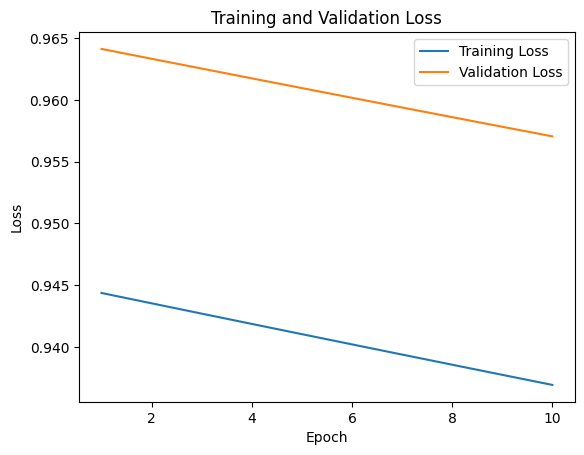

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Evaluating the results now:
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - binary_accuracy: 0.5134 - loss: 0.9374
Training Accuracy: 0.5182
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - binary_accuracy: 0.4832 - loss: 0.9736
Validation Accuracy: 0.4960
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - binary_accuracy: 0.4930 - loss: 0.9797
Test Accuracy: 0.4974


In [110]:
tf.random.set_seed(0)
model_j1 = build_model(num_features = X_train_1.shape[1], learning_rate = 0.0001)

fit_j1 = model_j1.fit(x = X_train_1, y = y_train, validation_data = (X_val_1,y_val), epochs = 10, batch_size = 32, verbose = 0)
loss_train = fit_j1.history['loss']
loss_val = fit_j1.history['val_loss']
epoch = np.arange(1,len(loss_train)+1)
plt.plot(epoch,loss_train,label = 'Training Loss')
plt.plot(epoch,loss_val,label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Model Summary
model_j1.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj1, train_accuracyj1 = model_j1.evaluate(X_train_1, y_train)
print(f"Training Accuracy: {train_accuracyj1:.4f}")

# Evaluate the model on the validation set
val_lossj1, val_accuracyj1 = model_j1.evaluate(X_val_1, y_val)
print(f"Validation Accuracy: {val_accuracyj1:.4f}")

# Evaluate the model on the test set
test_lossj1, test_accuracyj1= model_j1.evaluate(X_test_1, y_test)
print(f"Test Accuracy: {test_accuracyj1:.4f}")

In [111]:
tf.random.set_seed(0)
model_j2= build_model(num_features = X_train_1.shape[1], learning_rate = 0.02)
model = model_j2.fit(x= X_train_1, y=y_train, validation_data = (X_val_1,y_val), epochs = 30, verbose = 0)

#Model Summary
model_j2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_lossj2, train_accuracyj2 = model_j2.evaluate(X_train_1, y_train)
print(f"Training Accuracy: {train_accuracyj2:.4f}")

# Evaluate the model on the validation set
val_lossj2, val_accuracyj2 = model_j2.evaluate(X_val_1, y_val)
print(f"Validation Accuracy: {val_accuracyj2:.4f}")

# Evaluate the model on the test set
test_lossj2, test_accuracyj2= model_j2.evaluate(X_test_1, y_test)
print(f"Test Accuracy: {test_accuracyj2:.4f}")

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Evaluating the results now:
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - binary_accuracy: 0.5670 - loss: 0.6714
Training Accuracy: 0.5765
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - binary_accuracy: 0.5769 - loss: 0.6770
Validation Accuracy: 0.5626
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - binary_accuracy: 0.5669 - loss: 0.6744
Test Accuracy: 0.5543


In [112]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Random Forest With Limited Metrics
# Initialize the Random Forest model
model_j3 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model_j3.fit(X_train_1, y_train)

# Make predictions
y_train_j3 = model_j3.predict(X_train)
y_val_j3 = model_j3.predict(X_val)
y_test_j3 = model_j3.predict(X_test)

# Evaluate the model
train_accuracy_j3 = accuracy_score(y_train, y_train_j3)
val_accuracy_j3 = accuracy_score(y_val, y_val_j3)
test_accuracy_j3 = accuracy_score(y_test, y_test_j3)

precision_j3 = precision_score(y_test, y_test_j3)
recall_j3 = recall_score(y_test, y_test_j3)
f1_score_j3 = f1_score(y_test, y_test_j3)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy_j3:.4f}")
print(f"Validation Accuracy: {val_accuracy_j3:.4f}")
print(f"Test Accuracy: {test_accuracy_j3:.4f}")
print(f"Precision: {precision_j3:.4f}")
print(f"Recall: {recall_j3:.4f}")
print(f"F1 Score: {f1_score_j3:.4f}")

# Confusion Matrix
conf_matrix_j3 = confusion_matrix(y_test, y_test_j3)
print("Confusion Matrix:")
print(conf_matrix_j3)

Training Accuracy: 0.5103
Validation Accuracy: 0.4976
Test Accuracy: 0.4819
Precision: 0.4819
Recall: 1.0000
F1 Score: 0.6504
Confusion Matrix:
[[  0 701]
 [  0 652]]
